 # Medical Cost Personal Insurance EDA & Linear Regression
## Column Content
age: age of primary beneficiary  
sex: insurance contractor gender, female, male  
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  
children: Number of children covered by health insurance / Number of dependents  
smoker: Smoking  
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
charges: Individual medical costs billed by health insurance  
### Summary
The main aim of this notebook is to analyse how are the insurance cost impacted based on different variables which include region, age, whether a child or not, sex, bmi, smoker etc...

Each column is picked and analysed how they influence the insurance charge.

We'll be building and training a machine learning model that predicts insurance cost based on certain feature.

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [2]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [4]:
# importing dataset into jupyter notebook
medical_df = pd.read_csv('insurance.csv')

In [5]:
# viewing the first 5 rows of the medical insurance dataset
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The above table shows the first five rows of our dataset. 

In [6]:
# getting the shape of the dataframe
medical_df.shape

(1338, 7)

The medical insurance dataset contains 1338 rows and 7 columns

In [7]:
# getting information about the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In the medical dataset, the entries in the age and children columns are integers, the entries in the sex, smoker and region are characters and the  entries in the bmi and charges columns are decimals.

In [8]:
# to obtain the statistical summary of non numeric columns in the medical dataset such as unique, top, etc.
medical_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


This shows the unique values for sex, smoker and region as 2, 2 and 3 respectively, male dorminates the sex count and there are more patients from the Southeast region.

In [9]:
medical_df.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# checking for missing values
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no missing values

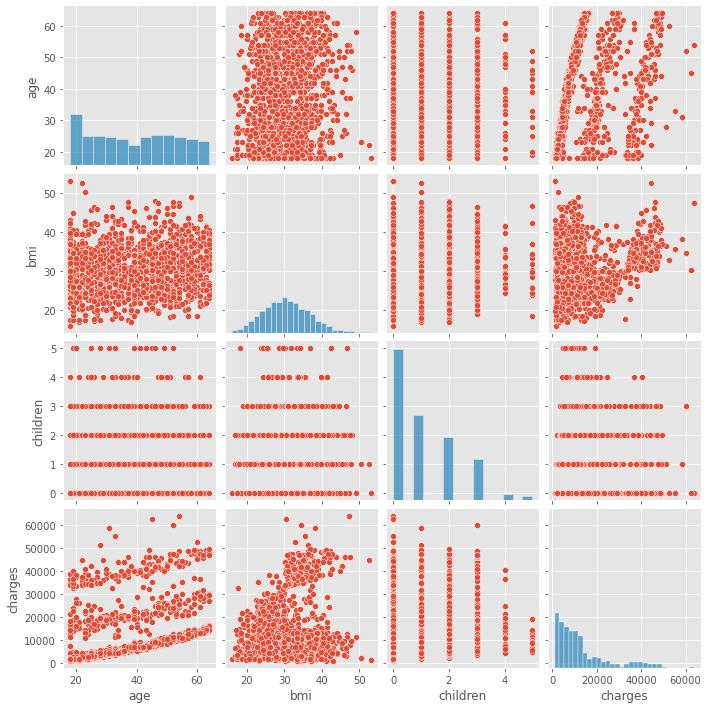

In [12]:

sns.pairplot(medical_df);

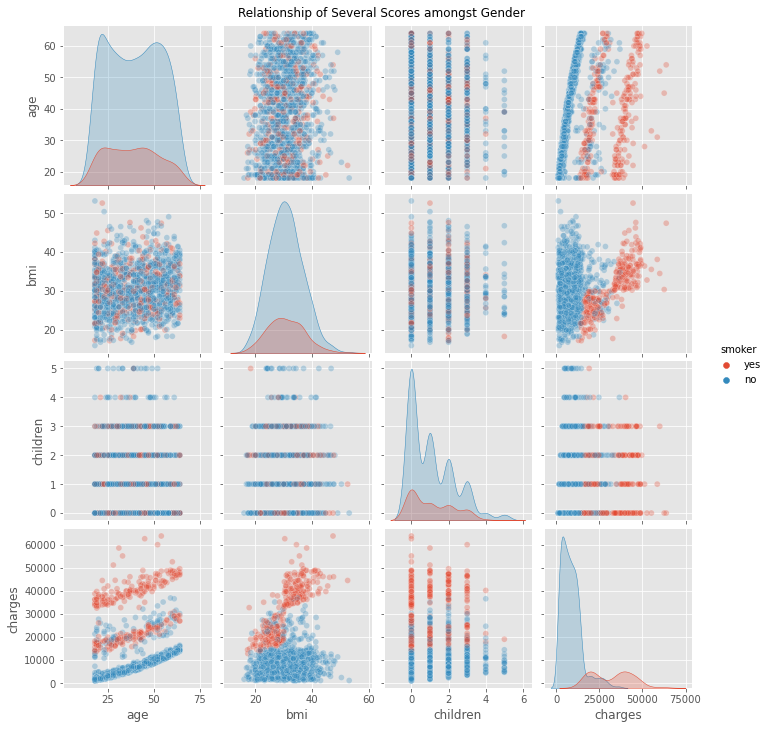

In [13]:
# visualizing the overall relationship of male and female across several features
sns.pairplot(data=medical_df,
             hue='smoker',
             plot_kws={'alpha':0.3}
            ).fig.suptitle('Relationship of Several Scores amongst Gender', 
                           y=1.01)
plt.show()

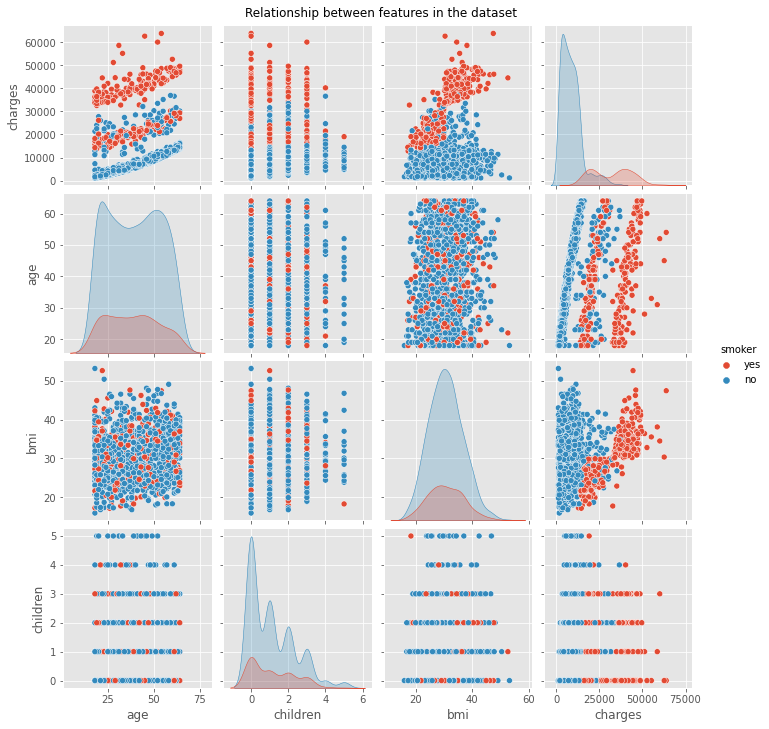

In [14]:
sns.pairplot(medical_df,
    x_vars=["age", "children", "bmi", "charges"],
    y_vars=["charges","age", "bmi", "children"],  hue='smoker',
).fig.suptitle('Relationship between features in the dataset', 
                           y=1.01);

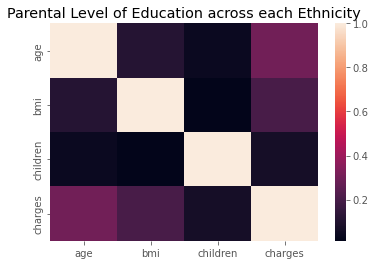

In [15]:
plt.title('Parental Level of Education across each Ethnicity')

sns.heatmap(medical_df.corr());

In [16]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


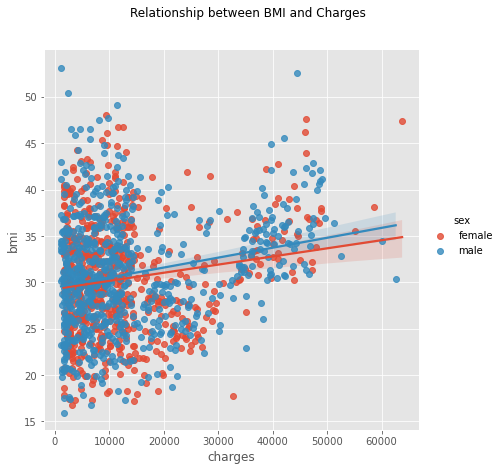

In [17]:

sns.pairplot(x_vars="charges", y_vars="bmi", data=medical_df, kind='reg',hue="sex", height=6).fig.suptitle("Relationship between BMI and Charges", y=1.08) ;


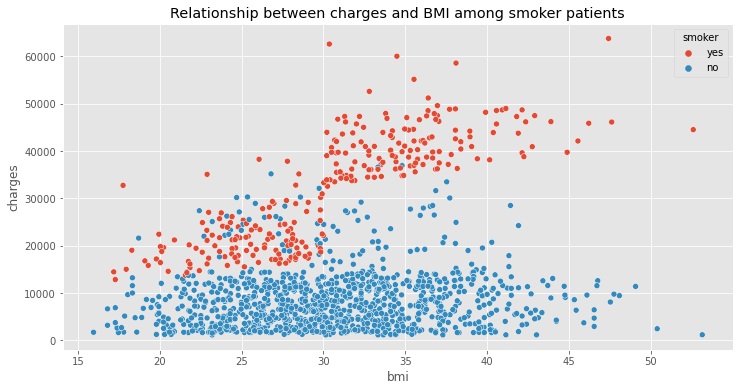

In [18]:
# Relationship between charges and BMI among smoker patients
plt.figure(figsize=(12, 6))
plt.title('Relationship between charges and BMI among smoker patients')
sns.scatterplot(x='bmi', y='charges', hue ='smoker', data=medical_df);

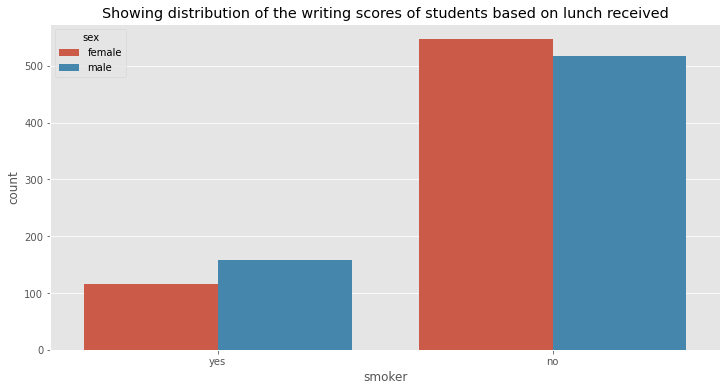

In [19]:
# distribution of writing score
plt.figure(figsize=(12, 6))
plt.title('Showing distribution of the writing scores of students based on lunch received')
sns.countplot(x='smoker', hue='sex' ,data=medical_df);

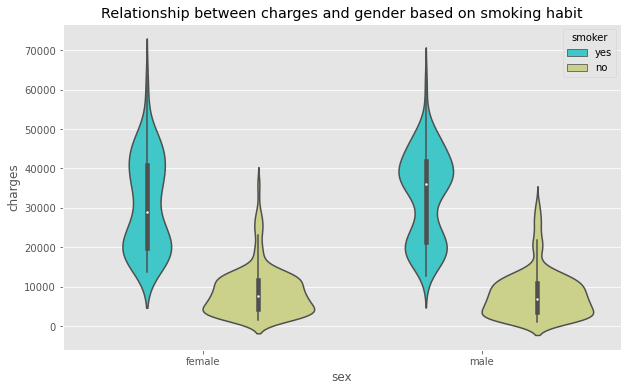

In [20]:
#showing the charges comparison across gender based on smoking habit
plt.figure(figsize=(10,6))
sns.violinplot(x='sex',y="charges",data=medical_df, hue='smoker', palette='rainbow')
plt.title("Relationship between charges and gender based on smoking habit");

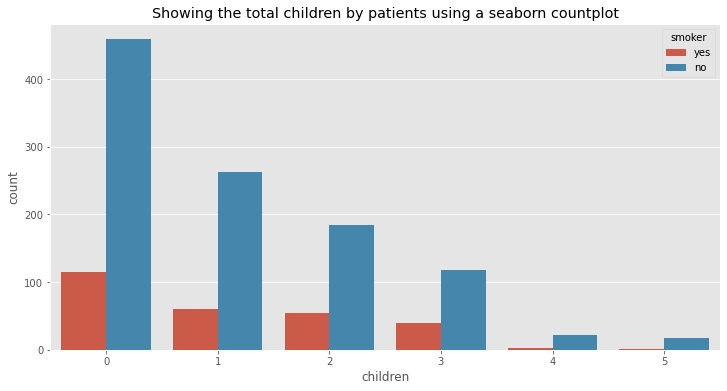

In [21]:
#to show the total children by patients using a seaborn countplot
plt.figure(figsize=(12, 6))
plt.title('Showing the total children by patients using a seaborn countplot')
sns.countplot(x='children', hue='smoker' ,data=medical_df);

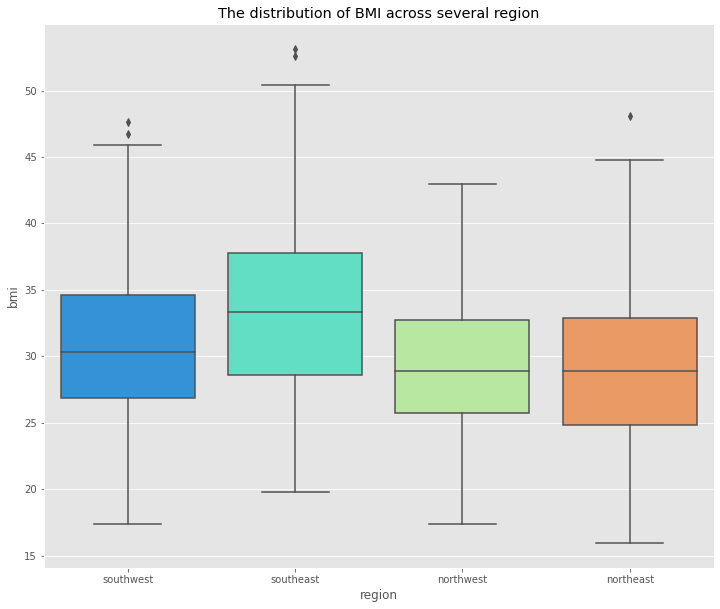

In [22]:
# Show the distribution of BMI across several region using a boxplot
plt.figure(figsize=(12,10))
sns.boxplot(x='region',y='bmi',data=medical_df, palette='rainbow')
plt.title("The distribution of BMI across several region");

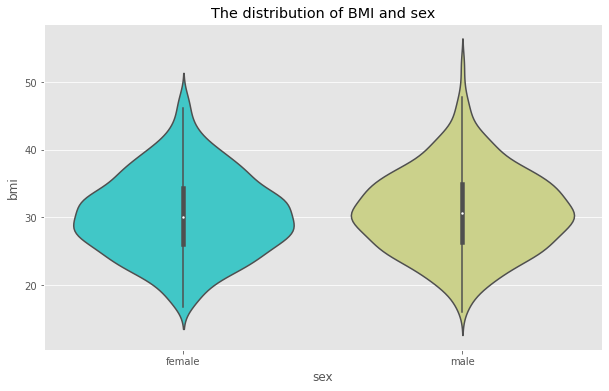

In [25]:
#to show the distribution of BMI and sex with a violi plot
plt.figure(figsize=(10,6))
sns.violinplot(x='sex',y="bmi",data=medical_df, palette='rainbow')
plt.title("The distribution of BMI and sex");

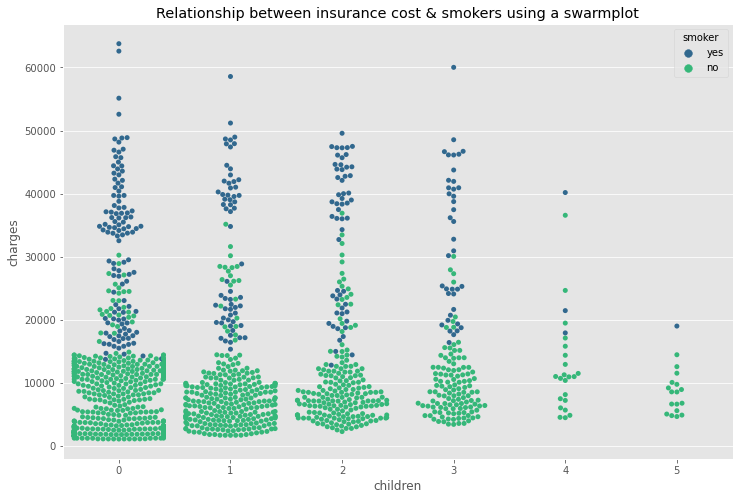

In [29]:
# to show relationship between insurance cost & smokers using a swarmplot (x-axis = children)
plt.figure(figsize=(12,8))
sns.swarmplot(x='children', y='charges', data=medical_df, hue='smoker', dodge=False, palette='viridis')
plt.title("Relationship between insurance cost & smokers using a swarmplot");

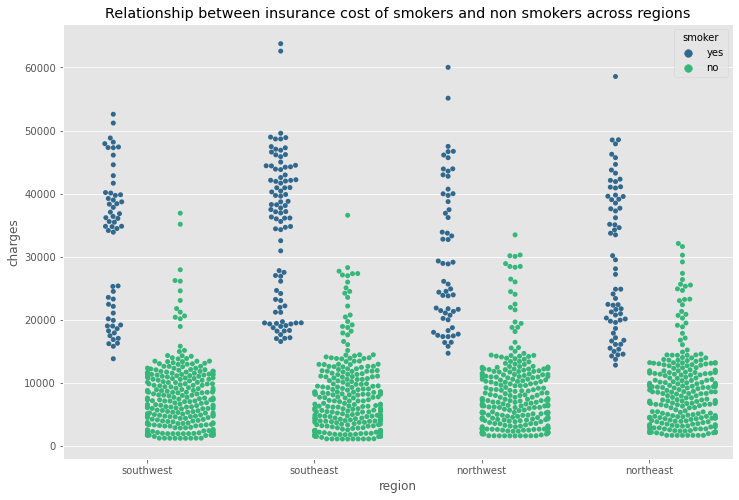

In [34]:
#plot the insurance charges of smokers vs non smokers across regions using a swarmplot

plt.figure(figsize=(12,8))
sns.swarmplot(x='region', y='charges', data=medical_df, hue='smoker', dodge=True, palette='viridis')
plt.title("Relationship between insurance cost of smokers and non smokers across regions");

#                                                     Part B

## Q: 1a. How many patients are less than 18 years and equal to 18?

In [55]:
# 1a. to show the number of  patients that  are less than 18 years and equal to 18?
medical_df.loc[(medical_df['age'] <=18)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1296,18,male,26.125,0,no,northeast,1708.92575
1315,18,male,28.310,1,no,northeast,11272.33139
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


# Q2:b. Clearly state the existing number of male and female in your result

In [59]:
medical_df.loc[(medical_df['age'] <= 18
               ) & 
               (medical_df['sex'] == 'female') 
              ].count()

age         33
sex         33
bmi         33
children    33
smoker      33
region      33
charges     33
dtype: int64

In [60]:
medical_df.loc[(medical_df['age'] <= 18
               ) & 
               (medical_df['sex'] == 'male') 
              ].count()

age         36
sex         36
bmi         36
children    36
smoker      36
region      36
charges     36
dtype: int64

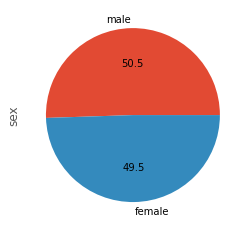

In [64]:
medical_df['sex'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f");

In [ ]:
medical_df['sex'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

# Q 2d.: How many patient above 18 have children and how many don't. visually show your result clearly with a pie chart and also show the percentage ratio

In [79]:
# checking how many students fall the category of free and standard lunch
display(medical_df.groupby((medical_df['age'] > 18))['children'].count())
medical_df.groupby(medical_df['age'] > 18)['children'].value_counts()

age
False      69
True     1269
Name: children, dtype: int64

age    children
False  0            51
       1             9
       2             6
       3             2
       4             1
True   0           523
       1           315
       2           234
       3           155
       4            24
       5            18
Name: children, dtype: int64